In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm

In [2]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [3]:
def get_accuracy_boost(X,y,title,times=20,xlabel='Number Estimators',Learning_rate_=[0.2,0.4,0.6,1], n_est = 100):

    lines_array=['solid','--', '-.', ':']

    N_estimators=[n*2 for n in range(1,n_est//2)]
    
    train_acc=np.zeros((times,len(Learning_rate_),len(N_estimators)))
    test_acc=np.zeros((times,len(Learning_rate_),len(N_estimators)))


    #Iterate through different number of Learning rate  and average out the results  
    
    for n in tqdm(range(times)):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
        for n_estimators in N_estimators:
            for j,lr in enumerate(Learning_rate_):


                model = XGBClassifier(objective=objective,learning_rate=lr,n_estimators=n_estimators,eval_metric='mlogloss')


                model.fit(X_train,y_train)



                Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  model)



                train_acc[n,j,(n_estimators//2)-1]=Accuracy['train Accuracy']
                test_acc[n,j,(n_estimators//2)-1]=Accuracy['test Accuracy']
    



    fig, ax1 = plt.subplots()
    mean_test=test_acc.mean(axis=0)
    mean_train=train_acc.mean(axis=0)
    ax2 = ax1.twinx()

    for j,(lr,line) in enumerate(zip(Learning_rate_,lines_array)): 

        ax1.plot(mean_train[j,:],linestyle = line,color='b',label="Learning rate "+str(lr))
        ax2.plot(mean_test[j,:],linestyle = line, color='r',label=str(lr))

    ax1.set_ylabel('Training accuracy',color='b')
    ax1.legend()
    ax2.set_ylabel('Testing accuracy', color='r')
    ax2.legend()
    ax1.set_xlabel(xlabel)
    plt.show()

In [4]:
churn_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")

churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [5]:
# churn_df.to_csv("ChurnData.csv", index=False)

In [6]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [7]:
X=churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]
y = churn_df['churn']

In [8]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)

In [9]:
from xgboost import XGBClassifier

In [10]:
objective='binary:logistic'
random_state=0
n_estimators=5
learning_rate=0.1

In [11]:
model = XGBClassifier(objective=objective, learning_rate=learning_rate, n_estimator=n_estimators, eval_metric = 'mlogloss')

In [12]:
model.learning_rate

0.1

In [13]:
model.objective

'binary:logistic'

In [14]:
model.n_estimators

In [15]:
model.fit(X_train, y_train)

C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:58:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimator=5,
              n_estimators=None, n_jobs=None, num_parallel_tree=None, ...)

In [16]:
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.6833333333333333, 'train Accuracy': 1.0}


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.58it/s]


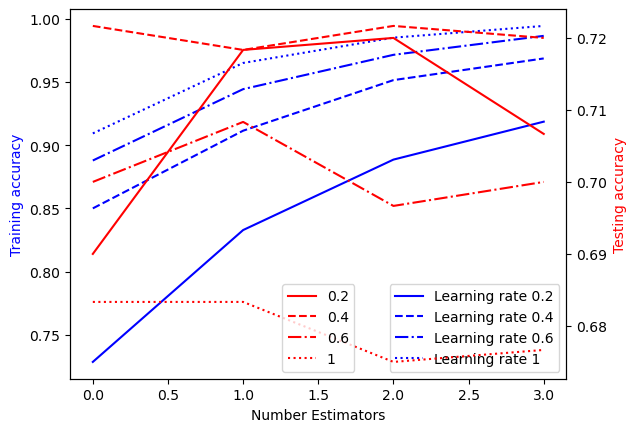

In [17]:
get_accuracy_boost(X,y,title="Training and Test Accuracy vs Weak Classifiers",times=10,xlabel='Number Estimators', n_est = 10)

In [18]:
eval_metric="error"

In [19]:
eval_set = [(X_test, y_test)]

In [20]:
model.set_params(eval_metric="error")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=5, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [21]:
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-error:0.23333
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.23333
[3]	validation_0-error:0.23333
[4]	validation_0-error:0.23333
[5]	validation_0-error:0.20000
[6]	validation_0-error:0.21667
[7]	validation_0-error:0.20000
[8]	validation_0-error:0.20000
[9]	validation_0-error:0.20000
[10]	validation_0-error:0.21667
[11]	validation_0-error:0.21667
[12]	validation_0-error:0.21667
[13]	validation_0-error:0.21667
[14]	validation_0-error:0.21667
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000


C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:58:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.30000
[52]	validation_0-error:0.31667
[53]	val

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=5, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [22]:
results = model.evals_result()
print(results)

{'validation_0': OrderedDict([('error', [0.23333333333333334, 0.23333333333333334, 0.23333333333333334, 0.23333333333333334, 0.23333333333333334, 0.2, 0.21666666666666667, 0.2, 0.2, 0.2, 0.21666666666666667, 0.21666666666666667, 0.21666666666666667, 0.21666666666666667, 0.21666666666666667, 0.23333333333333334, 0.23333333333333334, 0.2833333333333333, 0.26666666666666666, 0.26666666666666666, 0.25, 0.25, 0.26666666666666666, 0.2833333333333333, 0.2833333333333333, 0.3, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.3, 0.3, 0.3, 0.2833333333333333, 0.3, 0.3, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.26666666666666666, 0.2833333333333333, 0.26666666666666666, 0.26666666666666666, 0.2833333333333333, 0.3, 0.31666666666666665, 0.31666666666666665, 0.31666666666666665, 0.31666666666666665, 0.3166

Text(0, 0.5, 'Misclassified Samples')

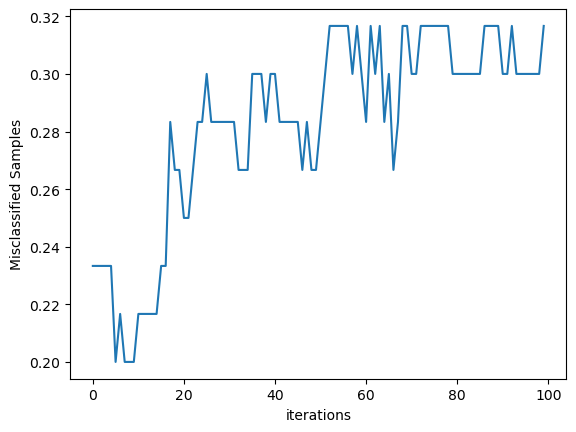

In [23]:
plt.plot(range(0, len(results['validation_0']['error'])), results['validation_0']['error'])
plt.xlabel('iterations')
plt.ylabel('Misclassified Samples')

In [24]:
eval_metric='logloss'
eval_set = [(X_train, y_train), (X_test, y_test)]
model.set_params(eval_metric=eval_metric)
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)
results=model.evals_result()

C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:58:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


In [25]:
results.keys()

dict_keys(['validation_0', 'validation_1'])

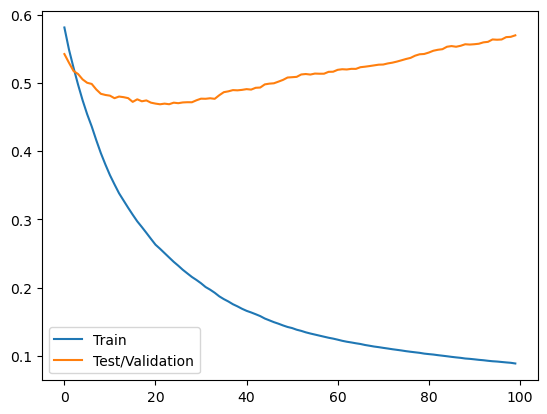

In [26]:
fig, ax = plt.subplots()
ax.plot( results['validation_0']['logloss'], label='Train')
ax.plot( results['validation_1']['logloss'], label='Test/Validation')
ax.legend()
plt.show()

In [27]:
early_stopping_rounds=10

In [28]:
eval_set = [(X_test, y_test)]
eval_metric='logloss'
model.set_params(eval_metric=eval_metric)
model.fit(X_train, y_train, eval_set=eval_set, verbose=True, early_stopping_rounds=early_stopping_rounds)

[0]	validation_0-logloss:0.54219
[1]	validation_0-logloss:0.52955
[2]	validation_0-logloss:0.51749
[3]	validation_0-logloss:0.51296
[4]	validation_0-logloss:0.50506
[5]	validation_0-logloss:0.50012
[6]	validation_0-logloss:0.49841
[7]	validation_0-logloss:0.49031
[8]	validation_0-logloss:0.48399
[9]	validation_0-logloss:0.48227
[10]	validation_0-logloss:0.48125
[11]	validation_0-logloss:0.47753
[12]	validation_0-logloss:0.47995
[13]	validation_0-logloss:0.47905
[14]	validation_0-logloss:0.47761
[15]	validation_0-logloss:0.47215
[16]	validation_0-logloss:0.47590
[17]	validation_0-logloss:0.47301
[18]	validation_0-logloss:0.47427
[19]	validation_0-logloss:0.47100
[20]	validation_0-logloss:0.46962
[21]	validation_0-logloss:0.46862
[22]	validation_0-logloss:0.46957
[23]	validation_0-logloss:0.46870
[24]	validation_0-logloss:0.47098
[25]	validation_0-logloss:0.47022
[26]	validation_0-logloss:0.47133
[27]	validation_0-logloss:0.47164
[28]	validation_0-logloss:0.47158
[29]	validation_0-loglos

C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:58:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimator=5,
              n_estimators=None, n_jobs=None, num_parallel_tree=None, ...)

In [29]:
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.75, 'train Accuracy': 0.95}


In [30]:
objective='binary:logistic'
learning_rate=0.1
n_estimators=10
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators,eval_metric='mlogloss')
model.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.8, 'train Accuracy': 0.85}


In [31]:
max_depth=3

In [32]:
model = XGBClassifier(objective=objective, learning_rate=learning_rate, n_estimators=n_estimators, eval_metric='mlogloss', max_depth=max_depth)
model.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.7666666666666667, 'train Accuracy': 0.8071428571428572}


In [33]:
min_child_weight=4

In [34]:
model = XGBClassifier(objective=objective, learning_rate=learning_rate, n_estimators=n_estimators, eval_metric='mlogloss', max_depth=max_depth, min_child_weight=min_child_weight)
model.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.7833333333333333, 'train Accuracy': 0.7928571428571428}


In [35]:
gamma=1
reg_lambda=2
alpha=1
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators,eval_metric='mlogloss',gamma=gamma,reg_lambda=reg_lambda,alpha=alpha)
model.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.7833333333333333, 'train Accuracy': 0.7785714285714286}


In [36]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")

df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [37]:
df= df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]

In [38]:
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [39]:
X =  df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [40]:
X=X.astype('int64')
y=df['Class']
y.unique()

array([2, 4], dtype=int64)

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [42]:
from sklearn.model_selection import  GridSearchCV

In [43]:
model =XGBClassifier(objective='binary:logistic',eval_metric='mlogloss')

In [44]:
param_grid = {'learning_rate': [0.1*(n+1) for n in range(5)],
             'n_estimators' : [2*n+1 for n in range(5)]}

param_grid 

{'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5],
 'n_estimators': [1, 3, 5, 7, 9]}

In [45]:
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring="neg_log_loss")

In [46]:
search.fit(X_train, y_train)

ValueError: 
All the 125 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1471, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [2 4]


In [47]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv", delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [58]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
X[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [59]:
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [61]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in X.columns:
    if X[i].dtype == 'object':
        X[i] = le.fit_transform(X[i])        
X = X[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

C:\Users\Muhammad Umer Khan\AppData\Local\Temp\ipykernel_3676\2722758662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = le.fit_transform(X[i])
C:\Users\Muhammad Umer Khan\AppData\Local\Temp\ipykernel_3676\2722758662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = le.fit_transform(X[i])
C:\Users\Muhammad Umer Khan\AppData\Local\Temp\ipykernel_3676\2722758662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [68]:
y = le.fit_transform(y)
y

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3,
       4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3,
       3, 3], dtype=int64)

In [69]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 5) (160,)
Test set: (40, 5) (40,)


In [70]:
param_grid = {'learning_rate': [0.1*(n+1) for n in range(2)],
             'n_estimators' : [2*n+1 for n in range(2)] }


param_grid

{'learning_rate': [0.1, 0.2], 'n_estimators': [1, 3]}

In [71]:
model =XGBClassifier(objective='binary:logistic',eval_metric='mlogloss')

In [72]:
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring="neg_log_loss")
search.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2], 'n_estimators': [1, 3]},
             scoring='neg_log_loss')

In [73]:
search.best_params_

{'learning_rate': 0.2, 'n_estimators': 3}

In [74]:
search.best_score_

-0.7940527306117487

In [75]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.85, 'train Accuracy': 1.0}
